In [2]:
import numpy as np
import pandas as pd

In [3]:
raw_df = pd.read_excel(open('data.xlsx', 'rb'),
              sheet_name='All', ).fillna('') 

raw_df = raw_df.replace({'\*': ''}, regex=True)
raw_df

,Dog,Elephant,Snake,Pig,Cow,Fish,Cat,Steak,Kebab,Pork,...,Airplane,Skateboard,Helicopter,Bicycle,Computer,Keyboard,Monitor,CPU,TV,Phone
0,Does a dog have ears?,The appearance of the Asiatic elephant is fami...,There could be a snake in the daylight.,"If I promise not to act like a misogynist pig,...","The Latin word for ""cow"" is vacca.",The fish flipped and dived back into the water.,I think the cat wants dessert!,That's a long way to drive for steak and potat...,"The insane person, who will actually eat a kebab.","Your pork chops were a big hit, by the way.",...,The company produces mechanical parts for airp...,It is a small park with a skateboard area.,We've got a helicopter on the way.,The boy no doubt inherits a capacity for ridin...,A computer can do some tasks better than a per...,"She began to paw at her computer keyboard, sea...","As he lifted the computer monitor, he caught s...","This year, Sony is seeking to top themselves w...",It's as safe as watching TV and a darned sight...,"The phone woke me up, even though it wasn't ve..."
1,Then let's have a seat and watch the puppy dog...,"Further, the skin is stated to be much less ro...","A mouse she could handle – literally, but a sn...","Oh, what a pig I am! he repeated, flushing sud...",Can't you eat a cow or a rabbit or something?,I ate very small fish for supper.,I'm in no mood to watch a cat fight tonight.,They each ordered a salad and steak and attack...,"You haven't had a dodgy doner kebab, have you?",The city is a manufacturing and railway centre...,...,The airplane cracked up in landing.,Finding the right skateboard can sound like qu...,The helicopter dropped and caught.,He ran out to his bicycle and pushed the kicks...,I haven't been near a computer since before I ...,The keyboard has five keys similar to those of...,It's my responsibility to monitor and deter th...,And uses almost ALL CPU to actually log in.,The only thing you watch on TV is football and...,Is he listening to your phone call?
2,My dog scared them away.,The Indian region is the home of the Indian el...,"If there is a snake under it, that puts a rock...","He couldn't very well say, 'I really am that p...",Although the technique of growing cowpox on co...,"You can be a cold fish, sometimes.",The cat would like to eat the mouse.,He forked a steak off the serving tray and han...,I followed with Fish kebab (£ 10.95) - a bumpe...,"It is known for its pork pies, and has a trade...",...,The government has just bought a new airplane.,"I'm 33, female, I skateboard a little, have do...",The helicopter lifted away before Brady had tw...,The only thing you watch on TV is football and...,Her phone and computer are monitored.,Each channel consists of a keyboard and receiv...,He turned away from the monitor and searched h...,We replaced the CPU soak tested for 48 hours a...,Let's go watch TV in the family room.,Martha handed her the phone and I could tell b...
3,"He held out his hand for the dog to sniff, but...",South of the Thames the thoroughfares crossing...,"In tropical waters a sea snake is found, which...","In 2006, a pig was genetically engineered to p...","Of animals, the cow and the pig are her favour...",Did you ever hunt or fish with your father?,A large grey cat was asleep on a rocking chair.,Says the veterinarian who envisioned steak lin...,They provide nothing for the serious kebab con...,Swine and pork are largely exported to Russia ...,...,The pilot crashed the airplane in landing.,Since 1999 we have been the UK 's premier onli...,She saw smoke moving across the sky a moment b...,"He wore bathing trunks, a Phillies baseball ca...","The computer screen before him was blank, but ...","Rita Angeltoni banged away on her keyboard, co...","After two hours' fighting, the ""Monitor"" was d...","The greater the number, the less CPU the proce...","I did TV too, a McDonald's commercial.",The phone woke me.
4,This dog helped him watch the sheep.,Mahmud ordered Hasan Maimandi to take the poet...,What if a

In [4]:
word_annotations = {
 'dog': 'animal',
 'elephant': 'animal',
 'snake': 'animal',
 'pig': 'animal',
 'cow': 'animal',
 'fish': 'animal',
 'cat': 'animal',
 'steak': 'meal',
 'kebab': 'meal',
 'pork': 'meal',
 'salad': 'meal',
 'tomato': 'meal',
 'onion': 'meal',
 'car': 'vehicle',
 'motorcycle': 'vehicle',
 'bike': 'vehicle',
 'airplane': 'vehicle',
 'skateboard': 'vehicle',
 'helicopter': 'vehicle',
 'bicycle': 'vehicle',
 'computer': 'technology',
 'keyboard': 'technology',
 'monitor': 'technology',
 'cpu': 'technology',
 'tv': 'technology',
 'phone': 'technology',
}

In [5]:
import re

PHRASES_PER_CATEGORY = 90

df = pd.DataFrame(columns=raw_df.columns)

for column in raw_df.columns:
    filtered_column = list(filter(lambda x: (x != '' and \
                                               f'{column.lower()}s' not in x.lower() and \
                                               x.lower().count(column.lower())==1), raw_df[column]))[:PHRASES_PER_CATEGORY]
    
    if not len(filtered_column) == PHRASES_PER_CATEGORY:
        raise ValueError(f'Column "{column}" does not have enough data. Lower the number of phrases per category or add new data.')

    
    pattern = re.compile(column, re.IGNORECASE)
#     highlighted_keyword_column = [pattern.sub(f'*{word_annotations[column.lower()]}*', x) for x in filtered_column]
    highlighted_keyword_column = [pattern.sub(f'*{column}*', x) for x in filtered_column]
    
    df[column] = pd.Series(highlighted_keyword_column)

#     df[column] = pd.Series(list(filter(lambda x: (f'{column.lower()}s' not in x.lower()), raw_df[column])))
#     df[column].
#     print(len(df[column].where(f'{column.lower()}s' not in df[column].lower())))
if not all([df[col].str.count("\*").sum() == PHRASES_PER_CATEGORY * 2 for col in df]):
    raise ValueError('Keywords not highlighted properly. Check your dataset.')
    


In [6]:
df

,Dog,Elephant,Snake,Pig,Cow,Fish,Cat,Steak,Kebab,Pork,...,Airplane,Skateboard,Helicopter,Bicycle,Computer,Keyboard,Monitor,CPU,TV,Phone
0,Does a *Dog* have ears?,The appearance of the Asiatic *Elephant* is fa...,There could be a *Snake* in the daylight.,If I promise not to act like a misogynist *Pig...,"The Latin word for ""*Cow*"" is vacca.",The *Fish* flipped and dived back into the water.,I think the *Cat* wants dessert!,That's a long way to drive for *Steak* and pot...,"The insane person, who will actually eat a *Ke...","Your *Pork* chops were a big hit, by the way.",...,The company produces mechanical parts for *Air...,It is a small park with a *Skateboard* area.,We've got a *Helicopter* on the way.,The boy no doubt inherits a capacity for ridin...,A *Computer* can do some tasks better than a p...,"She began to paw at her computer *Keyboard*, s...","As he lifted the computer *Monitor*, he caught...","This year, Sony is seeking to top themselves w...",It's as safe as watching *TV* and a darned sig...,"The *Phone* woke me up, even though it wasn't ..."
1,Then let's have a seat and watch the puppy *Do...,"Further, the skin is stated to be much less ro...","A mouse she could handle – literally, but a *S...","Oh, what a *Pig* I am! he repeated, flushing s...",Can't you eat a *Cow* or a rabbit or something?,I ate very small *Fish* for supper.,I'm in no mood to watch a *Cat* fight tonight.,They each ordered a salad and *Steak* and atta...,"You haven't had a dodgy doner *Kebab*, have you?",The city is a manufacturing and railway centre...,...,The *Airplane* cracked up in landing.,Finding the right *Skateboard* can sound like ...,The *Helicopter* dropped and caught.,He ran out to his *Bicycle* and pushed the kic...,I haven't been near a *Computer* since before ...,The *Keyboard* has five keys similar to those ...,It's my responsibility to *Monitor* and deter ...,And uses almost ALL *CPU* to actually log in.,The only thing you watch on *TV* is football a...,Is he listening to your *Phone* call?
2,My *Dog* scared them away.,The Indian region is the home of the Indian *E...,"In tropical waters a sea *Snake* is found, whi...","He couldn't very well say, 'I really am that *...","Of animals, the *Cow* and the pig are her favo...","You can be a cold *Fish*, sometimes.",The *Cat* would like to eat the mouse.,He forked a *Steak* off the serving tray and h...,I followed with Fish *Kebab* (£ 10.95) - a bum...,"It is known for its *Pork* pies, and has a tra...",...,The government has just bought a new *Airplane*.,"I'm 33, female, I *Skateboard* a little, have ...",The *Helicopter* lifted away before Brady had ...,The only thing you watch on TV is football and...,Her phone and *Computer* are monitored.,Each channel consists of a *Keyboard* and rece...,He turned away from the *Monitor* and searched...,We replaced the *CPU* soak tested for 48 hours...,Let's go watch *TV* in the family room.,Martha handed her the *Phone* and I could tell...
3,"He held out his hand for the *Dog* to sniff, b...",South of the Thames the thoroughfares crossing...,What if a *Snake* had been in those bushes?,"In 2006, a *Pig* was genetically engineered to...",An elk *Cow* burst out of the brush and skidde...,Did you ever hunt or *Fish* with your father?,A large grey *Cat* was asleep on a rocking chair.,Says the veterinarian who envisioned *Steak* l...,They provide nothing for the serious *Kebab* c...,Swine and *Pork* are largely exported to Russi...,...,The pilot crashed the *Airplane* in landing.,Since 1999 we have been the UK 's premier onli...,She saw smoke moving across the sky a moment b...,"He wore bathing trunks, a Phillies baseball ca...","The *Computer* screen before him was blank, bu...","Rita Angeltoni banged away on her *Keyboard*, ...","After two hours' fighting, the ""*Monitor*"" was...","The greater the number, the less *CPU* the pro...","I did *TV* too, a McDonald's commercial.",The *Phone* woke me.
4,This *Dog* helped him watch the sheep.,It is chiefly

In [7]:
train_df = df.iloc[::3, :]
test_df = df.drop(df.iloc[::3, :].index)

print(f'Number of phrases per category for train set: {len(train_df)}')
print(f'Number of phrases per category for test set: {len(test_df)}')

Number of phrases per category for train set: 30
Number of phrases per category for test set: 60


In [8]:
def prepare_data(df):
    new_df = pd.DataFrame({'text' : [], 'keyword': []})
    texts = []
    keywords = []
    for column in df:
        texts.extend(df[column])
        keyword_for_column = f'{word_annotations[column.lower()]} {column.lower()}'
        keywords.extend(len(df[column])*[keyword_for_column])
    return pd.DataFrame({'text' : texts, 'keyword': keywords})

prepare_data(test_df).to_csv('test.csv', index=False)
prepare_data(train_df).to_csv('train.csv', index=False)

In [9]:
import pickle

def load_keyword_embeddings(path):
    with open(path, 'rb') as f:
        return pickle.load(f)
    
kw_embeds = load_keyword_embeddings('kw_embeds_opt.pickle')
print(kw_embeds)

{'animal dog': array([-4.39514995e-01,  1.78724006e-01, -1.57004505e-01, -2.13450000e-01,
        7.39379972e-02,  4.48095024e-01, -1.28823504e-01, -1.19749904e-02,
       -1.51214004e-01,  2.10225010e+00, -5.96549988e-01,  6.33750036e-02,
       -4.04359996e-01,  1.48420498e-01, -2.27219999e-01,  1.13290995e-01,
        3.01835001e-01,  1.34054995e+00,  1.73810005e-01, -5.29484987e-01,
       -3.73730004e-01,  1.67960003e-01,  5.67449927e-02, -1.39654994e-01,
        6.78749979e-02,  1.81398496e-01, -1.48149952e-02, -2.08468556e-01,
        1.15778998e-01, -2.46380001e-01, -5.09000003e-01, -1.16880000e-01,
       -5.32700121e-03,  3.39169979e-01,  4.64275002e-01,  1.30735010e-01,
        2.32408509e-01, -8.03184986e-01, -1.37008995e-01,  2.21905008e-01,
        2.35762000e-01,  4.87690046e-02, -2.30134994e-01, -1.76788002e-01,
       -5.34950010e-02, -2.58269995e-01, -4.76245016e-01,  1.79611489e-01,
        1.49210006e-01, -4.07263003e-02, -2.33149976e-02,  3.97900045e-02,
        3.

D:\dev\neural-semantic-embeddings\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\dev\neural-semantic-embeddings\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


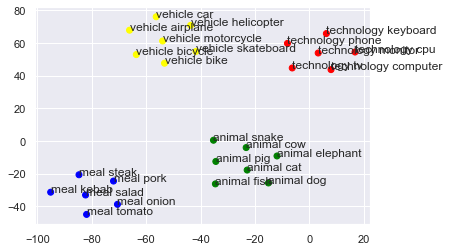

In [10]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import seaborn as sns

sns.set()

categories = {'animal':'green', 'meal':'blue', 'vehicle':'yellow', 'technology':'red'}

X = []

# Spaghetti code - clean it later
words = list(kw_embeds.keys())

for col in words:
    X.append(kw_embeds[col])
  

tsne = TSNE(n_components=2, n_iter=3000, random_state=np.random.RandomState(20), perplexity=10)
X_tsne = tsne.fit_transform(X)

c = [categories[x.split()[0]] for x in words]

fig, ax = plt.subplots()
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=c)

for i, txt in enumerate(X):
    ax.annotate(words[i], (X_tsne[:, 0][i], X_tsne[:, 1][i]))